In [391]:
##Importing the libraries

In [392]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.7.0'

In [393]:
##Loading the Images

In [394]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [395]:
path='/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images'

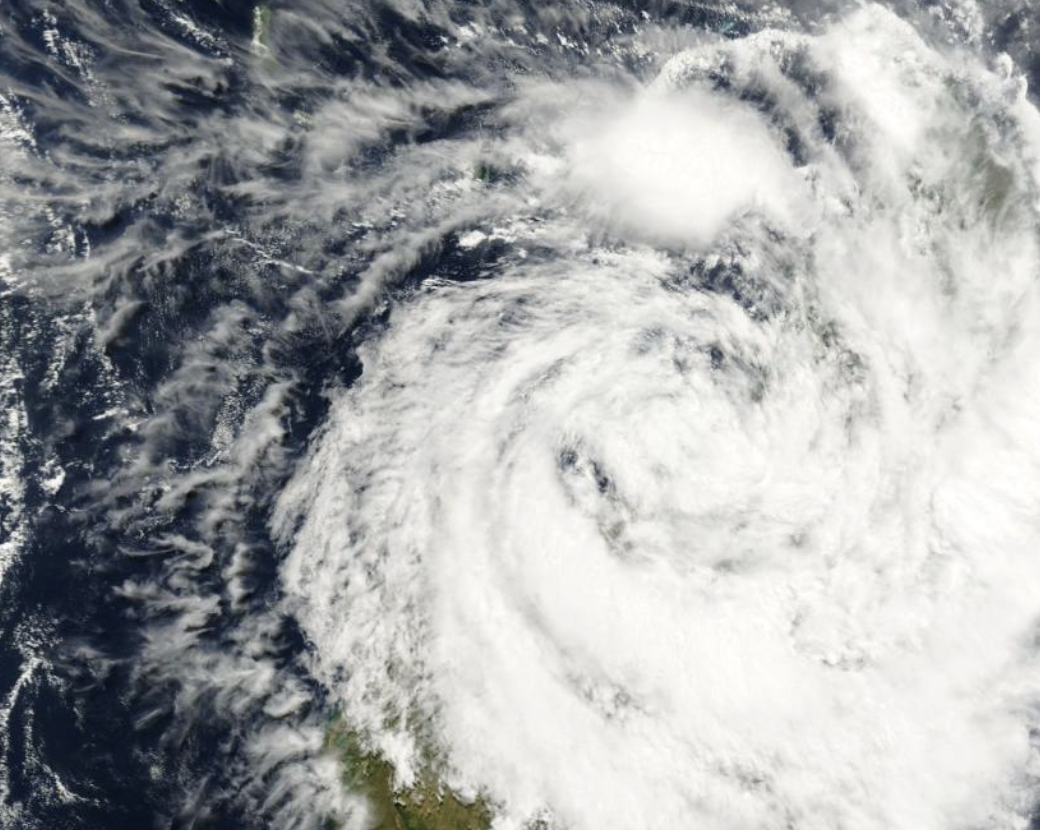

In [396]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train/Severe Tropical Storm_SS/Screenshot 2022-01-31 at 10.16.07 PM.png')

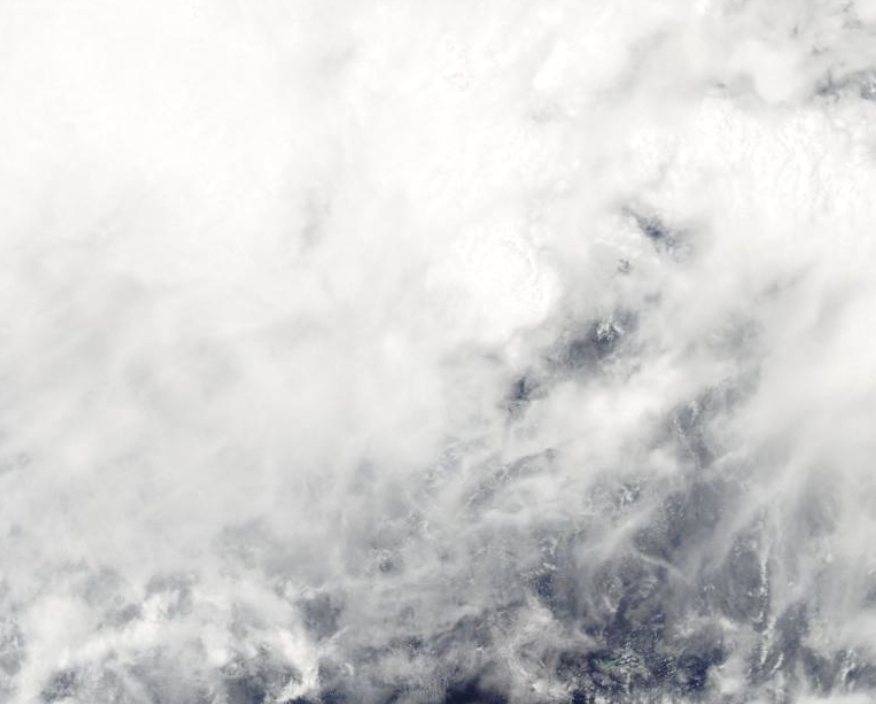

In [397]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train/Tropical Depression_D/Screenshot 2022-02-02 at 6.54.24 PM.png')

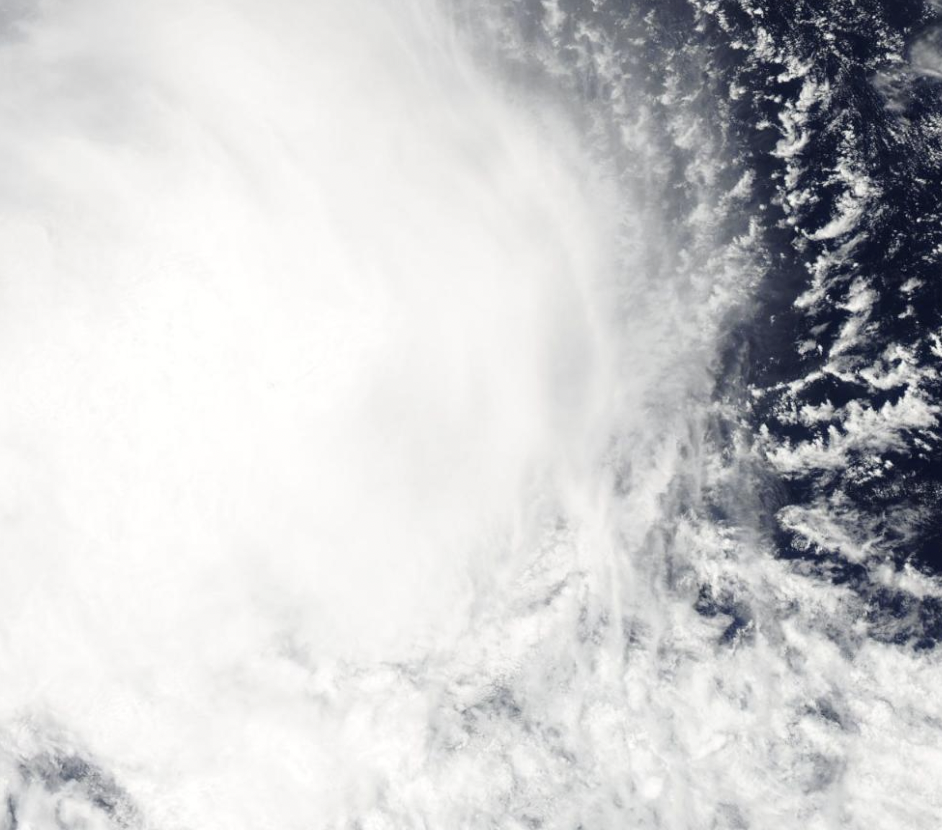

In [398]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train/Tropical Strom_S_40/Screenshot 2022-02-02 at 11.10.19 PM.png')



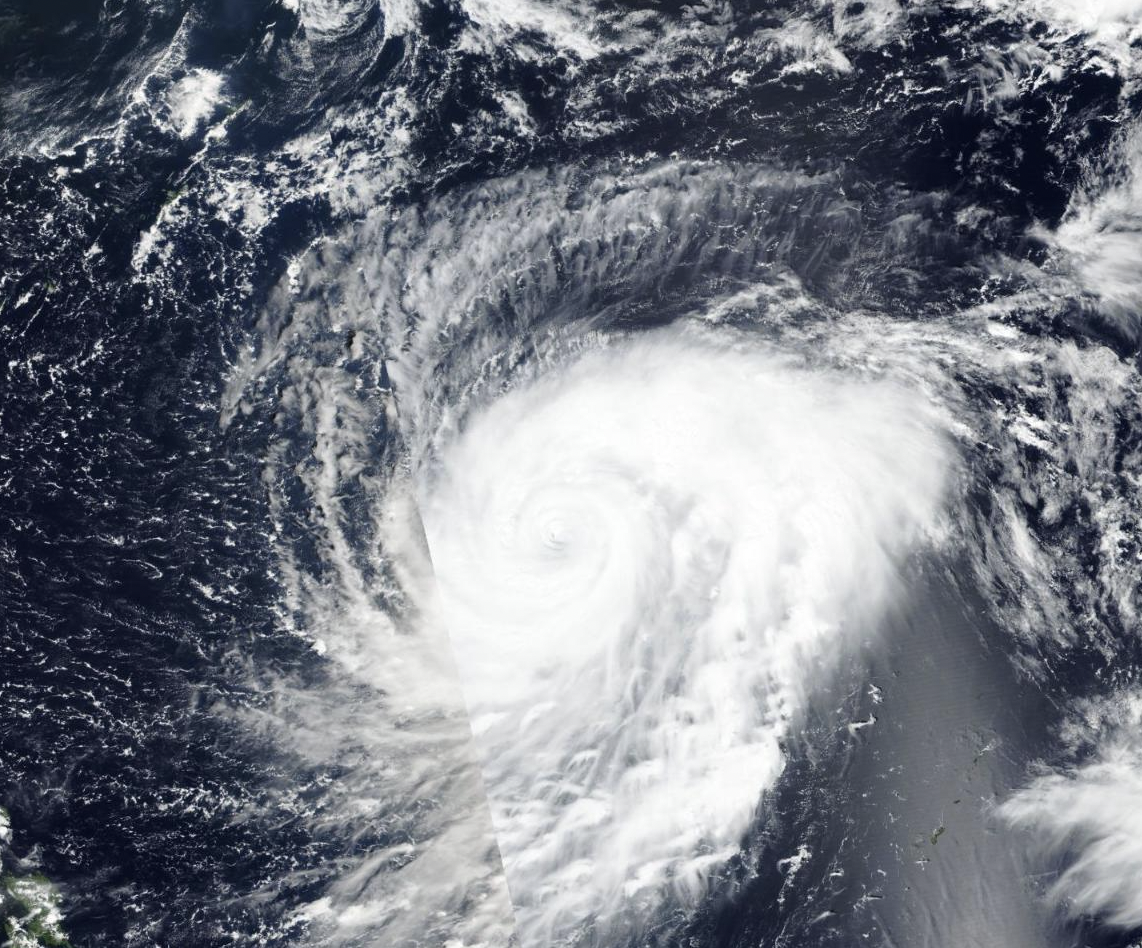

In [399]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train/Typhoon_T/Screenshot 2021-12-22 at 8.13.47 PM.png')

In [400]:
training_datagenerator = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip= True)

In [401]:
train_dataset=training_datagenerator.flow_from_directory('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train',
                                                         target_size=(64,64),
                                                         batch_size=32,
                                                         class_mode='categorical',
                                                         shuffle=True)

Found 160 images belonging to 4 classes.


In [402]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3], dtype=int32)

In [403]:
train_dataset.class_indices

{'Severe Tropical Storm_SS': 0,
 'Tropical Depression_D': 1,
 'Tropical Strom_S_40': 2,
 'Typhoon_T': 3}

In [404]:
test_datagenrator=ImageDataGenerator(rescale = 1./255)

In [405]:
test_dataset=training_datagenerator.flow_from_directory('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Test',
                                                        target_size=(64,64),
                                                        batch_size=1,
                                                        class_mode='categorical',
                                                        shuffle=False)

Found 80 images belonging to 4 classes.


In [406]:
##BUILDING AND TRAINING THE neural NETWORK

In [407]:
#num of inputs+num out put/2
#(1152+4)/2

In [408]:
classifier=Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPool2D(pool_size= (2,2)))

classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPool2D(pool_size= (2,2)))

classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPool2D(pool_size= (2,2)))

classifier.add(Flatten())

#classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=4, activation='softmax'))

classifier.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 6, 6, 32)        

In [439]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [440]:
hist=classifier.fit_generator(train_dataset,epochs=120,validation_data=train_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/120
5/5 [==============================] - 16s 4s/step - loss: 0.2368 - accuracy: 0.9187 - val_loss: 0.6356 - val_accuracy: 0.7500
Epoch 2/120
5/5 [==============================] - 14s 3s/step - loss: 0.4184 - accuracy: 0.8062 - val_loss: 0.3163 - val_accuracy: 0.8750
Epoch 3/120
5/5 [==============================] - 15s 3s/step - loss: 0.2612 - accuracy: 0.8875 - val_loss: 0.2356 - val_accuracy: 0.9000
Epoch 4/120
5/5 [==============================] - 15s 3s/step - loss: 0.2031 - accuracy: 0.9062 - val_loss: 0.2360 - val_accuracy: 0.9000
Epoch 5/120
5/5 [==============================] - 14s 3s/step - loss: 0.1976 - accuracy: 0.9062 - val_loss: 0.1255 - val_accuracy: 0.9500
Epoch 6/120
5/5 [==============================] - 15s 3s/step - loss: 0.1606 - accuracy: 0.9625 - val_loss: 0.2138 - val_accuracy: 0.9312
Epoch 7/120
5/5 [==============================] - 15s 3s/step - loss: 0.1284 - accuracy: 0.9688 - val_loss: 0.1028 - val_accuracy: 0.9750
Epoch 8/120
5/5 [==========

In [ ]:
#120=45

In [441]:
classifier.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 6, 6, 32)        

In [442]:
test_dataset.class_indices

{'Severe Tropical Storm_20': 0,
 'Tropical Depression_20': 1,
 'Tropical Strom_20': 2,
 'Typhoon_T': 3}

In [443]:
predictions=classifier.predict(test_dataset)
predictions

array([[9.99976873e-01, 2.10034204e-06, 9.55425548e-07, 2.00759914e-05],
       [9.95133698e-01, 1.22561920e-04, 4.77442461e-11, 4.74369759e-03],
       [9.91723478e-01, 3.16087417e-17, 2.22507470e-08, 8.27653613e-03],
       [9.99996066e-01, 2.90270013e-11, 6.76297490e-11, 3.92045149e-06],
       [2.69510474e-05, 9.99973059e-01, 4.95016528e-10, 9.19933956e-14],
       [1.24302995e-08, 8.59934092e-03, 9.91400659e-01, 9.43772133e-19],
       [8.72729743e-07, 9.98678386e-01, 1.32081553e-03, 5.14271713e-16],
       [9.99999881e-01, 3.39657226e-15, 1.44191716e-07, 1.62973546e-09],
       [9.73354638e-01, 1.98491901e-16, 8.35847459e-04, 2.58094147e-02],
       [9.98777926e-01, 2.02171307e-07, 1.20843307e-03, 1.34073471e-05],
       [8.32840621e-01, 2.65137214e-06, 9.34099447e-08, 1.67156592e-01],
       [9.98827279e-01, 2.42987488e-04, 4.77484321e-07, 9.29206435e-04],
       [2.70180171e-04, 7.13740265e-13, 9.99729812e-01, 9.05905420e-11],
       [1.76889916e-08, 4.45085652e-06, 1.10086475e

In [444]:
predictions=np.argmax(predictions,axis=1)
predictions

array([0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2, 3, 0, 0, 3, 0, 2, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 2, 3, 1, 3, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3])

In [445]:
test_dataset.class_indices

{'Severe Tropical Storm_20': 0,
 'Tropical Depression_20': 1,
 'Tropical Strom_20': 2,
 'Typhoon_T': 3}

In [446]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [447]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.6375

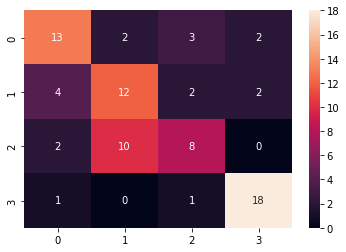

In [448]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_dataset.classes,predictions)
sns.heatmap(cm,annot=True)

In [449]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes,predictions))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65        20
           1       0.50      0.60      0.55        20
           2       0.57      0.40      0.47        20
           3       0.82      0.90      0.86        20

    accuracy                           0.64        80
   macro avg       0.63      0.64      0.63        80
weighted avg       0.63      0.64      0.63        80



Text(0, 0.5, 'Train and test loss ')

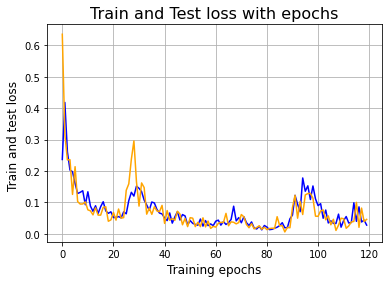

In [450]:
#ploting trsults with accuracy
plt.plot(hist.history['loss'],color='blue',label='train')
plt.plot(hist.history['val_loss'],color='orange',label='train')
plt.grid(True)
plt.title("Train and Test loss with epochs", fontsize=16)
plt.xlabel('Training epochs',fontsize=12)
plt.ylabel('Train and test loss ',fontsize=12)

Text(0, 0.5, 'Train and test accuracy')

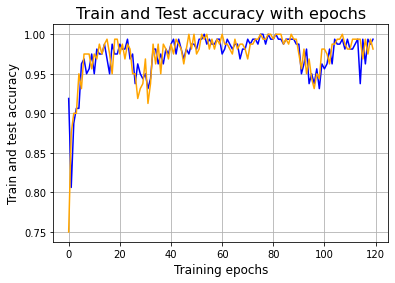

In [451]:
#ploting trsults with accuracy
plt.plot(hist.history['accuracy'],color='blue',label='train')
plt.plot(hist.history['val_accuracy'],color='orange',label='train')
plt.grid(True)
plt.title("Train and Test accuracy with epochs", fontsize=16)
plt.xlabel('Training epochs',fontsize=12)
plt.ylabel('Train and test accuracy',fontsize=12)

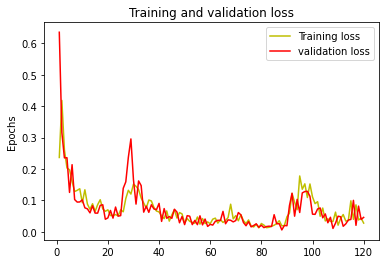

In [452]:
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
#plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.title('Training and validation loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

In [ ]:
##classifying one single image

In [454]:
image=cv2.imread('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/sam_test/Screenshot 2022-02-03 at 12.16.10 PM.png')

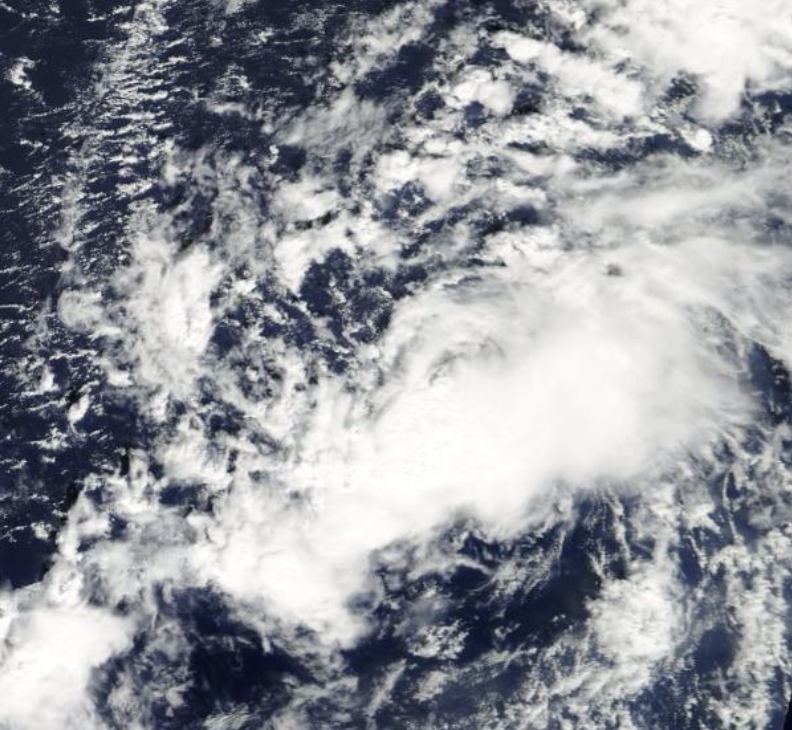

In [426]:
cv2_imshow(image)

In [455]:
image.shape

(730, 792, 3)

In [428]:
#image

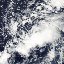

In [456]:
#reshape image
image=cv2.resize(image,(64,64))
cv2_imshow(image)

In [430]:
image

array([[[108,  93,  89],
        [ 47,  33,  27],
        [ 69,  52,  47],
        ...,
        [236, 240, 241],
        [238, 241, 243],
        [227, 231, 232]],

       [[ 49,  31,  27],
        [ 52,  35,  30],
        [134, 121, 116],
        ...,
        [233, 236, 238],
        [236, 239, 239],
        [240, 243, 244]],

       [[ 49,  30,  26],
        [ 54,  36,  32],
        [ 52,  35,  32],
        ...,
        [234, 238, 238],
        [236, 239, 240],
        [245, 248, 249]],

       ...,

       [[246, 247, 249],
        [247, 248, 249],
        [245, 247, 247],
        ...,
        [204, 207, 205],
        [157, 140, 131],
        [113, 104,  99]],

       [[236, 238, 240],
        [237, 238, 240],
        [232, 234, 235],
        ...,
        [208, 210, 209],
        [ 94,  70,  59],
        [ 92,  78,  73]],

       [[200, 199, 198],
        [221, 221, 220],
        [226, 228, 228],
        ...,
        [180, 181, 175],
        [ 74,  47,  36],
        [ 30,   8,   6]]

In [431]:
image=image/255

In [457]:
image

array([[[108,  93,  89],
        [ 47,  33,  27],
        [ 69,  52,  47],
        ...,
        [236, 240, 241],
        [238, 241, 243],
        [227, 231, 232]],

       [[ 49,  31,  27],
        [ 52,  35,  30],
        [134, 121, 116],
        ...,
        [233, 236, 238],
        [236, 239, 239],
        [240, 243, 244]],

       [[ 49,  30,  26],
        [ 54,  36,  32],
        [ 52,  35,  32],
        ...,
        [234, 238, 238],
        [236, 239, 240],
        [245, 248, 249]],

       ...,

       [[246, 247, 249],
        [247, 248, 249],
        [245, 247, 247],
        ...,
        [204, 207, 205],
        [157, 140, 131],
        [113, 104,  99]],

       [[236, 238, 240],
        [237, 238, 240],
        [232, 234, 235],
        ...,
        [208, 210, 209],
        [ 94,  70,  59],
        [ 92,  78,  73]],

       [[200, 199, 198],
        [221, 221, 220],
        [226, 228, 228],
        ...,
        [180, 181, 175],
        [ 74,  47,  36],
        [ 30,   8,   6]]

In [433]:
image.shape

(64, 64, 3)

In [462]:
image=image.reshape(-1,64,64,3)
image.shape

(1, 64, 64, 3)

In [463]:
result =classifier.predict(image)
result


array([[1., 0., 0., 0.]], dtype=float32)

In [464]:
result=np.argmax(result)
result

0

In [465]:
test_dataset.class_indices

{'Severe Tropical Storm_20': 0,
 'Tropical Depression_20': 1,
 'Tropical Strom_20': 2,
 'Typhoon_T': 3}

In [438]:
##the prediction is able to classify -Typhoon and Severe Tropical Storm